#### Bi 410/510 (Fall 2019)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

**Group Members**

If this is a group submission edit this cell to add the names and e-mail addresses of the other people who worked on the project.
* Peregrine Painter (ppainter@uoregon.edu)
* Alex Wong (awong8@uoregon.edu)
* Dorian Yeh (dyeh@uoregon.edu)

# <span style="color:seagreen;">Project 6: &nbsp; Visualization</span>

###  <span style="color:seagreen">Import the Library</span>

Make sure you execute this code cell each time you open the notebook:

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

###  <span style="color:seagreen">Data File</span>

To complete this project you will need a CSV file named `oregon_football.csv`. 
The easiest way to download the file is to start a Docker shell, `cd` to the directory where you saved this notebook, and use the `download` shortcut:
```
$ download oregon_football.csv
```
Save the data file in the same the same folder as this notebook.

###  <span style="color:seagreen">Exercise 6.1: Parse the File</span> 

The file named `oregon_football.csv` is a CSV file with records describing football games played by the University of Oregon. Here is an example line:
```
1917-01-01,1916,Pennsylvania,14,0
```

The first field is the date the game was played. The second is the season the game belonged to; in this example, the game was played on January 1, 1917, but that was the end of the 1916 football season.

The third field is the name of the opposing team, and the last two fields are the number of points scored by the Ducks and the number of points scored by the opponent.

Implement a function named `parse_football_data` that will be passed a list of lines from a CSV file with records in the format described above.  It should return a dictionary with three items:
```
{
   'season': [....],
   'scored':  [....],
   'allowed:  [....],
}
```
The lists will be the sequence of values read from the corresponding column.

#### Example 

Here is a list with the first 5 games in the data set:
```
[
    '1916-10-07,1916,Willamette,97,0\n',
    '1916-10-14,1916,Multnomah A.C.,28,0\n',
    '1916-10-21,1916,California,39,14\n',
    '1916-11-04,1916,Washington,0,0\n',
    '1916-11-11,1916,Washington State,12,3\n',
]
```
If we pass that list to the function should return a dictionary that looks like this:
```
{
    'season': [1916, 1916, 1916, 1916, 1916],
    'scored': [97, 28, 39, 0, 12],
    'allowed': [0, 0, 14, 0, 3]
}
 ```
 
**Important:** Notice how each year and each score have been converted to ints.

In [2]:
def parse_football_data(lst):
### init. lists
    season = []
    scored = []
    allowed = []
    
    for n in lst:
        line = n.strip().split(',')
#         print(line)
        season.append(int(line[1]))
        scored.append(int(line[-2]))
        allowed.append(int(line[-1]))
        
    stats_dict = {'season' : season, 'scored': scored, 'allowed': allowed} # Player_Points
    return stats_dict


In [3]:
! head -5 oregon_football.csv


date,season,opponent,points_scored,points_allowed
1916-10-07,1916,Willamette,97,0
1916-10-14,1916,Multnomah A.C.,28,0
1916-10-21,1916,California,39,14
1916-11-04,1916,Washington,0,0


##### Tests 

Here is a code cell you can use to test the function on the first five games.  The result should be this dictionary:
```
{'season': [1916, 1916, 1916, 1916, 1916],
 'scored': [97, 28, 39, 0, 12],
 'allowed': [0, 0, 14, 0, 3]}

```
Note: the cell has been locked, you won't be able to change it.

In [4]:
parse_football_data([
    '1916-10-07,1916,Willamette,97,0\n',
    '1916-10-14,1916,Multnomah A.C.,28,0\n',
    '1916-10-21,1916,California,39,14\n',
    '1916-11-04,1916,Washington,0,0\n',
    '1916-11-11,1916,Washington State,12,3\n',
])

{'season': [1916, 1916, 1916, 1916, 1916],
 'scored': [97, 28, 39, 0, 12],
 'allowed': [0, 0, 14, 0, 3]}

When your function is working execute this code cell to define a variable named `fb` that has the results of all the games.  The first line in the file is the header, containing field names, so it is not passed to the parser.

(This cell is also locked).

In [5]:
with open('oregon_football.csv') as f:
    lines = f.readlines()
    
fb = parse_football_data(lines[1:])

#### Tests

In [6]:
assert len(fb['scored']) == len(fb['allowed']) == 1068

In [7]:
assert sum(fb['scored']) == 23784
assert sum(fb['allowed']) == 20235

###  <span style="color:seagreen">Exercise 6.2: Dot Plot</span>

Use the code cells below to produce a "dot plot" of points scored in all the games.  You can assume the scores are in the dictionary named `fb` as a result of running the test for the previous exercise.

The goal is to draw green dots for points Oregon scored, and red dots for points scored by opponents.  For each plot, the $x$-coordinates will be the year the game was played, and the $y$-coordinates will be the point values.

Your plot should look something like this:

<img src="https://pages.uoregon.edu/conery/Bi410/football_dotplot.png"/>

Some notes:
* your figure should have a title and a legend
* you can experiment with different colors or dot sizes, or use other decorations
* there will be several cases where dots overlap, when the Ducks or their opponents score the same number of points in different games in the same season; you can decide whether you want to plot red dots first or green dots first
* if the figure seems too small, you can call `plt.figure` to change the size, for example this makes a 12" x 9" figure:
```
plt.figure(figsize=[12,9])
```
* you do not have to save your plot in a file, simply make sure you have calls to plot functions so the drawing appears in your notebook when we run it.

One more note: in my figure I reduced the number of times dots overlap by adding 0.5 to the $x$-coordinates of the red dots.  You don't have to do this (or you can experiment with different offset amounts).

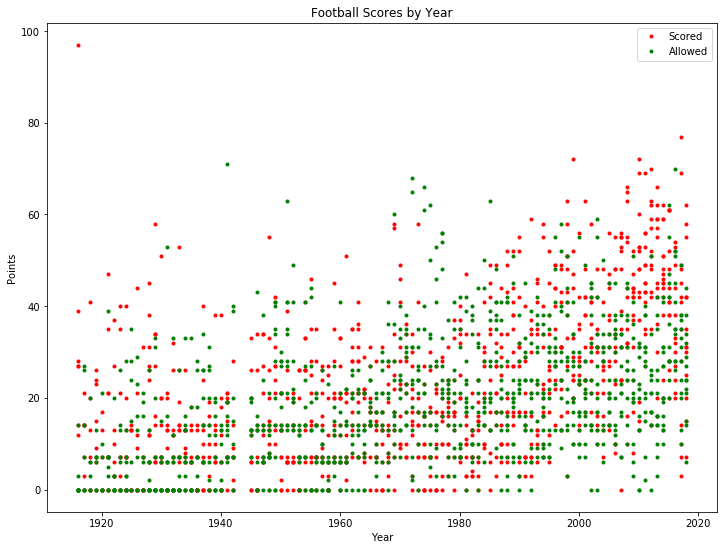

In [8]:
plt.figure(figsize=[12,9])

plt.title(label = 'Football Scores by Year')
plt.xlabel('Year')
plt.ylabel('Points')
plt.plot(fb['season'],
         fb['scored'],
         'ro',
         label = 'Scored',
         markersize = 3)
plt.plot(fb['season'],
         fb['allowed'],
         'go',
         label = 'Allowed',
         markersize = 3)
plt.legend(loc='upper right')
plt.show()


###  <span style="color:seagreen">Exercise 6.3: Group Scores by Year</span>

Define a function that will be passed the dictionary of football scores and a year.
The function should return a pair of numbers: the total number of points scored by Oregon in games played that year, and the total number of points scored by opponents.

To illustrate how this function should work, this statement will make a dictionary using a very small subset of the data, containing five games:
```
dct = parse_football_data([
    '1916-10-21,1916,California,39,14\n',
    '1916-11-04,1916,Washington,0,0\n',
    '1916-11-11,1916,Washington State,12,3\n',
    '1917-11-17,1917,California,21,0\n',
    '1917-11-29,1917,Oregon State,7,14\n'
]
```

Three games are from the 1916 season and two are from the 1917 season.  This is the expected result when you ask your function to compute the points scored in 1916:
```
>>> total_by_year(dct, 1916)
(51, 17)
```

In [9]:
def total_by_year(inputs, year):
    scored_tot = 0
    allowed_tot = 0
    
    for n in range(len(inputs['season'])):
        if int(year) == inputs['season'][n]:
            scored_tot += inputs['scored'][n]
            allowed_tot += inputs['allowed'][n]
    return (scored_tot, allowed_tot)
            

You can use these code cells to test your function on the tiny data set.  The expected results are shown above.

In [10]:
dct = parse_football_data([
    '1916-10-21,1916,California,39,14\n',
    '1916-11-04,1916,Washington,0,0\n',
    '1916-11-11,1916,Washington State,12,3\n',
    '1917-11-17,1917,California,21,0\n',
    '1917-11-29,1917,Oregon State,7,14\n'
])

In [11]:
# print(dct)
# print(dct['season'])
# print(len(dct['season']))
# print(dct['season'][1])

In [12]:
total_by_year(dct, 1916)

(51, 17)

##### Tests

When your function is working, execute this code cell to compute the total points for every year from 1916 to 2018 and save the result as a dictionary named `fbs` (for "football seasons").
* this loop is not the best way to create the `fbs` dictionary, since it is very inefficient, but it's a good test of your `total_by_year` function

In [13]:
fbs = {'season': [], 'scored': [], 'allowed': []}
for y in range(1916, 2019):
    scored, allowed = total_by_year(fb, y)
    fbs['season'].append(y)
    fbs['scored'].append(scored)
    fbs['allowed'].append(allowed)

We'll use these assertions when grading your project:

In [14]:
assert len(fbs['season']) == 103

In [15]:
assert sum(fbs['scored']) == 23784

In [16]:
# print(fbs)

###  <span style="color:seagreen">Exercise 6.4: Scoring Trends</span>

For this project create a plot that shows the total points scored in each season, using the data in the dictionary named `fbs`.

Draw two lines, one in green showing points scored by Oregon, and one in red showing total points scored by the opponents.
The $x$-axis will be the same as before, but now the $y$-coordinate of a point will the total points scored during that season.

This figure should also have a title and legend, and again you are free to experiment with colors, line styles, _etc_.

<img src="https://pages.uoregon.edu/conery/Bi410/football_trends.png"/>

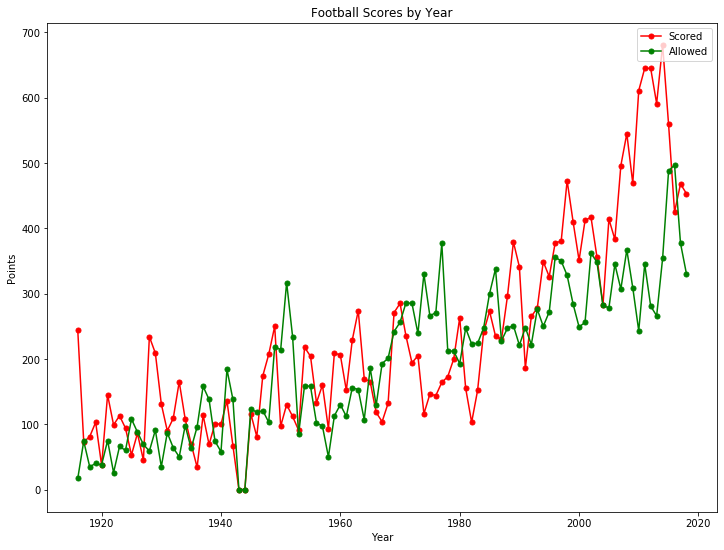

In [17]:
plt.figure(figsize=[12,9])

plt.title(label = 'Football Scores by Year')
plt.xlabel('Year')
plt.ylabel('Points')

plt.plot(fbs['season'],
         fbs['scored'],
         'r-o', label = 'Scored',
         markersize = 5)
plt.plot(fbs['season'],
         fbs['allowed'],
         'g-o',
         label = 'Allowed',
         markersize = 5)

plt.legend(loc='upper right')

plt.show()


###  <span style="color:seagreen">Exercise 6.5: Group Scores by Decade</span>

For this exercise you need to define a function named `total_by_decade` that will compute total scores over a 10-year period. 

This function is almost identical to the `total_by_year` function.  It's so similar, in fact, that you might want to start by copying that function, pasting it in the code cell below, and changing the name.

The only difference is that instead of passing a year to the function the argument will be the first year in a decade, _e.g._ 1920, 1980, or 2000.
As you iterate over the data set you want to see if the `season` field is a year in that decade.
For example, if the decade is 1990, you want to include games with seasons between 1990 and 1999.  

The easiest way to see if a season belongs to a decade is to divide the season by 10, using integer arithmetic, and then multiply the result by 10.  Using the year 1997 as an example,  `1997 // 10 = 199`, and `199 * 10 = 1990`, so the decade for 1997 is 1990.

Here is another tiny data set to test the new function. There are four games, two of them from the decade between 2000 and 2009, and two from the decade 2010 to 2019.
```
dct = parse_football_data([
    '2008-08-30,2008,Washington,44,10\n',
    '2009-10-24,2009,Washington,43,19\n',
    '2010-11-06,2010,Washington,53,16\n',
    '2011-11-05,2011,Washington,34,17\n',
])
```

Passing this dictionary and 2000 to the function should return the sum of points scored and points allowed in the  two games that were played between 2000 and 2009:
```
>>> total_by_decade(dct, 2000)
(87, 29)
```

In [18]:
def decade_of(n):         # I dont want have to do this math more than once -P
    dec = int(n) // 10 * 10
    return dec

### Start actual function
def total_by_decade(inputs, year):
    scored_tot = 0
    allowed_tot = 0
    
    for n in range(len(inputs['season'])):
        if decade_of(year) == decade_of(inputs['season'][n]): # applying that decade() function, I am sorry I'm lazy - P
            scored_tot += inputs['scored'][n]
            allowed_tot += inputs['allowed'][n]
    return (scored_tot, allowed_tot)
            

You can use these code cells to test your function on the 4-game data set:

In [19]:
dct = parse_football_data([
    '2008-08-30,2008,Washington,44,10\n',
    '2009-10-24,2009,Washington,43,19\n',
    '2010-11-06,2010,Washington,53,16\n',
    '2011-11-05,2011,Washington,34,17\n',
])

In [20]:
total_by_decade(dct, 2000)

(87, 29)

##### Tests 

When your function is working, execute this code cell to compute the total points for every decade from 1920 to 2010 and save the result as a dictionary named `fbd` (for "football decades").

In [21]:
fbd = {'decade': [], 'scored': [], 'allowed': []}
for y in range(1920, 2020, 10):
    scored, allowed = total_by_decade(fb, y)
    fbd['decade'].append(y)
    fbd['scored'].append(scored)
    fbd['allowed'].append(allowed)

We'll use these assertions when grading your project:

In [22]:
assert len(fbd['decade']) == 10

In [23]:
assert fbd['scored'][-1] == 5078

###  <span style="color:seagreen">Exercise 6.6: Bar Plot</span>

Use the code cell below to draw a bar plot of points scored in each decade, using the data in the `fbd` dictionary.

There are 10 decades, so there will be 10 pairs of bars.  
Use green bars for points scored by Oregon and red bars for points scored by opponents. 
The plot should include a title and legend.  

Note that you will need to define two sets of $x$-coordinates, one for the green bars and one for the red bars.
There is an example similar to this in the lecture notes.

My plot is shown below. Feel free to experiment with alternative colors and styles (for example, can you include every decade in the horizontal axis label, perhaps displayed at an angle so they aren't so crowded?).

<img src="https://pages.uoregon.edu/conery/Bi410/football_decades.png"/>

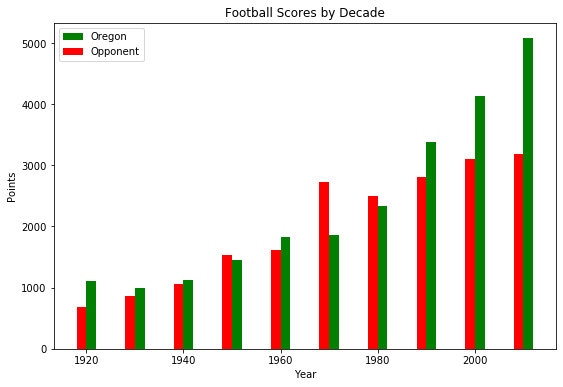

In [25]:
plt.figure(figsize=[9,6])

plt.title(label = 'Football Scores by Decade')
plt.xlabel('Year')
plt.ylabel('Points')


plt.bar([1+k for k in fbd['decade']],
        fbd['scored'],
        width=2,
        color='g',
        label='Oregon')
plt.bar([k-1 for k in fbd['decade']],
        fbd['allowed'],
        width=2,
        color='r',
        label='Opponent')

plt.legend(loc='upper left')

plt.show()